**`Market Basket Analysis`**

In [40]:
#AprioriAlgorithm -mlxtend
!pip install mlxtend

Prepare Data

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd 
df = pd.read_csv('drive/My Drive/Customer Preference Survey - Weekday (Responses) - Form Responses 1.csv')
df.head(10)

,Timestamp,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,10/20/2020 10:10:07,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
1,10/20/2020 10:10:09,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
2,10/20/2020 10:10:28,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไ่ม่เคยซื้อ
3,10/20/2020 10:10:31,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/20/2020 10:10:35,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
5,10/20/2020 10:10:37,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
6,10/20/2020 10:10:45,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
7,10/20/2020 10:10:50,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
8,10/20/2020 10:10:55,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
9,10/20/2020 10:11:04,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ


In [43]:
#Check Missing Data
missing = df.isnull().sum()
print(missing)

Timestamp              0
เสื้อกันฝน             0
เต็นท์                 0
เครื่อง Playstation    0
รองเท้า Vans           0
หูฟัง Bluetooth        0
โรบอทดูดฝุ่น           0
แผ่นไวนิล              0
E-Book                 0
ยาดม                   0
ลำโพงฟังเพลง           0
เครื่องฟอกอากาศในรถ    0
Pesto Sauce            0
มาสคาร่า               0
Milo Cereal Bar        0
น้ำวิตามิน             0
น้ำอัดลม               0
dtype: int64


In [44]:
df.drop(columns = 'Timestamp', inplace = True )

In [45]:
df.dropna(inplace = True)

In [46]:
#convert string to float 
df.replace(["เคยซื้อ", "เคย"], 1.0, inplace = True)
df.replace(["ไม่เคยซื้อ", "ไ่ม่เคยซื้อ","ไม่เคย"], 0.0, inplace = True)
df.head(5)

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [47]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip

In [48]:
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [49]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula', size=18)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df.sum().sort_values(ascending = False).head(10)

น้ำอัดลม               20.0
ลำโพงฟังเพลง           18.0
เสื้อกันฝน             18.0
ยาดม                   16.0
หูฟัง Bluetooth        15.0
น้ำวิตามิน             14.0
E-Book                 14.0
Milo Cereal Bar        11.0
เครื่อง Playstation     9.0
มาสคาร่า                8.0
dtype: float64

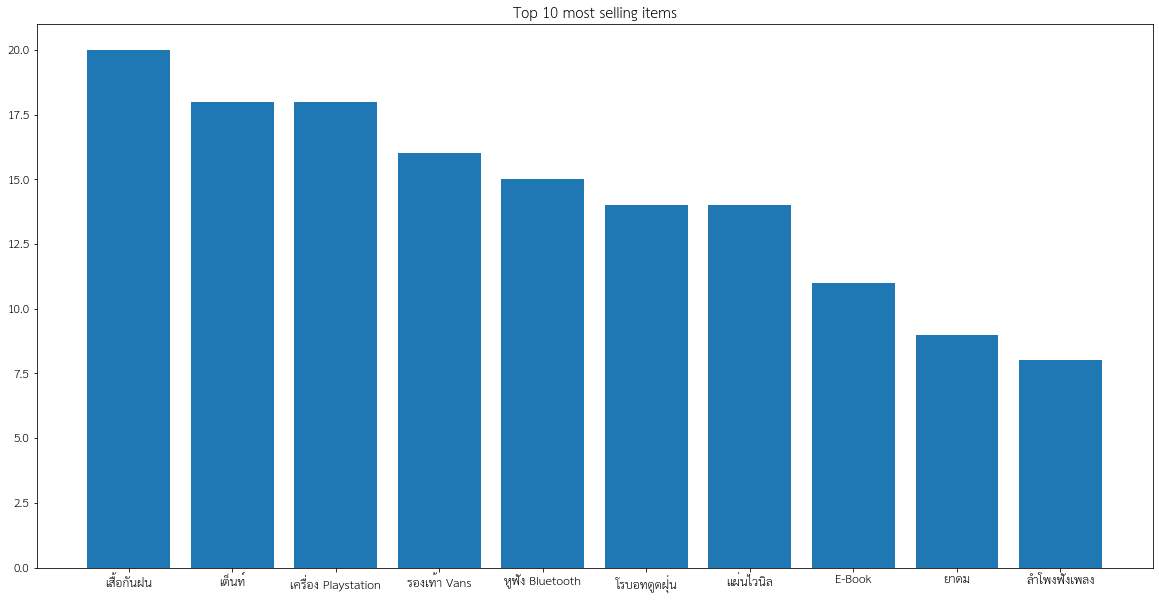

In [52]:
#Plot Top 10 most selling items
df_for_top10_Items = df.sum().sort_values(ascending=False).head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(20,10))
Items_name = ['เสื้อกันฝน',	'เต็นท์'	,'เครื่อง Playstation',	'รองเท้า Vans',	'หูฟัง Bluetooth',	'โรบอทดูดฝุ่น',	
              'แผ่นไวนิล',	'E-Book',	'ยาดม',	'ลำโพงฟังเพลง'	,'เครื่องฟอกอากาศในรถ',	'Pesto Sauce',	'มาสคาร่า'	,
              'Milo Cereal Bar',	'น้ำวิตามิน',	'น้ำอัดลม']
plt.bar(Item_array, df_for_top10_Items.iloc[:])
plt.xticks(Item_array, Items_name)
plt.title('Top 10 most selling items')
plt.show()

In [53]:
#Determine product association using apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support = 0.5, use_colnames = True)

In [54]:
#List out rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(E-Book),(เสื้อกันฝน),0.666667,0.857143,0.666667,1.000000,1.166667,0.095238,inf
1,(เสื้อกันฝน),(E-Book),0.857143,0.666667,0.666667,0.777778,1.166667,0.095238,1.500000
2,(ยาดม),(เสื้อกันฝน),0.761905,0.857143,0.714286,0.937500,1.093750,0.061224,2.285714
3,(เสื้อกันฝน),(ยาดม),0.857143,0.761905,0.714286,0.833333,1.093750,0.061224,1.428571
4,(น้ำวิตามิน),(เสื้อกันฝน),0.666667,0.857143,0.619048,0.928571,1.083333,0.047619,2.000000
5,(เสื้อกันฝน),(น้ำวิตามิน),0.857143,0.666667,0.619048,0.722222,1.083333,0.047619,1.200000
6,(ยาดม),(หูฟัง Bluetooth),0.761905,0.714286,0.571429,0.750000,1.050000,0.027211,1.142857
7,(หูฟัง Bluetooth),(ยาดม),0.714286,0.761905,0.571429,0.800000,1.050000,0.027211,1.190476
8,(ลำโพงฟังเพลง),(หูฟัง Bluetooth),0.857143,0.714286,0.666667,0.777778,1.088889,0.054422,1.285714
9,(หูฟัง Bluetooth),(ลำโพงฟังเพลง),0.714286,0.857143,0.666667,0.933333,1.088889,0.054422,2.142857


In [67]:
#Filter rules
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(E-Book),(เสื้อกันฝน),0.666667,0.857143,0.666667,1.000000,1.166667,0.095238,inf
1,(เสื้อกันฝน),(E-Book),0.857143,0.666667,0.666667,0.777778,1.166667,0.095238,1.500000
2,(ยาดม),(เสื้อกันฝน),0.761905,0.857143,0.714286,0.937500,1.093750,0.061224,2.285714
3,(เสื้อกันฝน),(ยาดม),0.857143,0.761905,0.714286,0.833333,1.093750,0.061224,1.428571
4,(น้ำวิตามิน),(เสื้อกันฝน),0.666667,0.857143,0.619048,0.928571,1.083333,0.047619,2.000000
...,...,...,...,...,...,...,...,...,...
187,"(น้ำวิตามิน, น้ำอัดลม)","(ยาดม, ลำโพงฟังเพลง)",0.666667,0.714286,0.523810,0.785714,1.100000,0.047619,1.333333
188,(ยาดม),"(น้ำวิตามิน, ลำโพงฟังเพลง, น้ำอัดลม)",0.761905,0.571429,0.523810,0.687500,1.203125,0.088435,1.371429
189,(ลำโพงฟังเพลง),"(ยาดม, น้ำวิตามิน, น้ำอัดลม)",0.857143,0.523810,0.523810,0.611111,1.166667,0.074830,1.224490
190,(น้ำวิตามิน),"(ยาดม, ลำโพงฟังเพลง, น้ำอัดลม)",0.666667,0.666667,0.523810,0.785714,1.178571,0.079365,1.555556


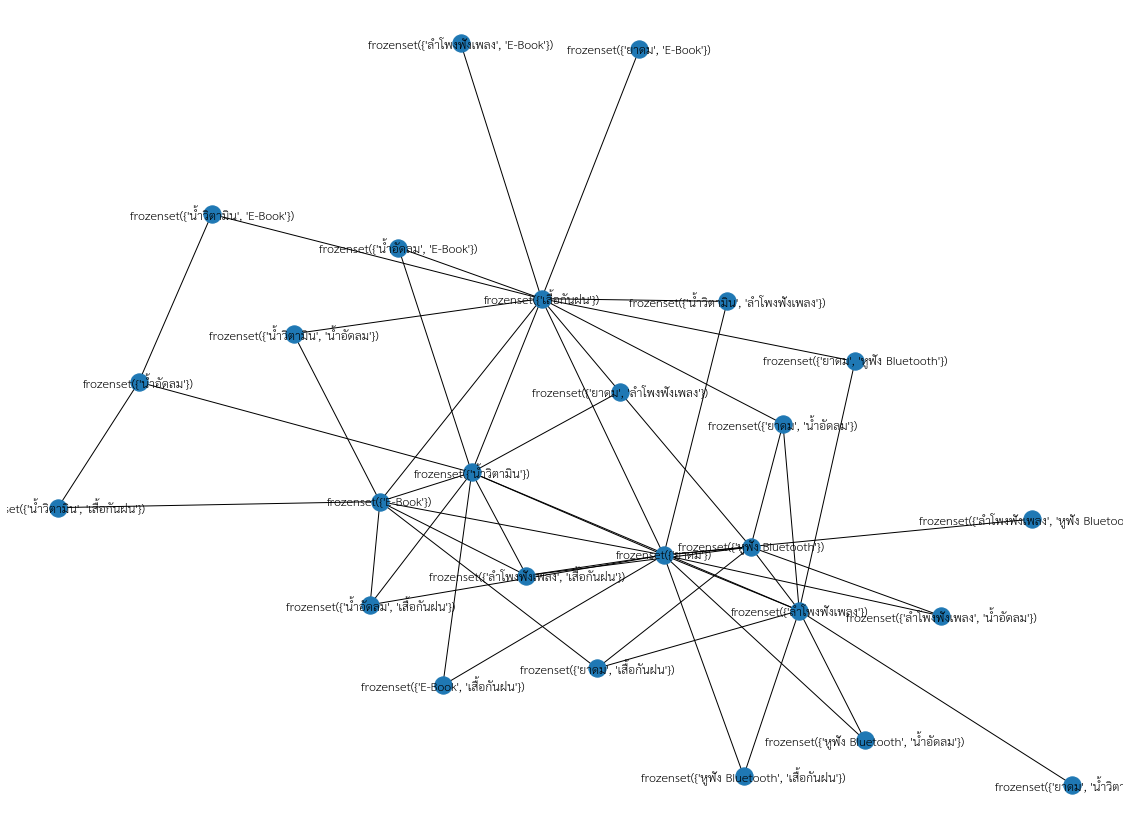

In [68]:
#Visualize rules
import networkx as nx
fig, ax = plt.subplots(figsize=(20,15))
GA = nx.from_pandas_edgelist(rules[:100], source='antecedents',target='consequents')
nx.draw(GA, with_labels=True, font_family='TH Sarabun Chula', font_size=18)
plt.show()

**`Collaborative Filtering`**

In [70]:
#Prepare Data
item_item_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
item_item_matrix

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
เสื้อกันฝน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เต็นท์,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่อง Playstation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
รองเท้า Vans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
หูฟัง Bluetooth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
โรบอทดูดฝุ่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แผ่นไวนิล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E-Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ยาดม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ลำโพงฟังเพลง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Calculate Cosine Similarity
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [61]:
#Convert results into list of rules
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item', 'value']

In [62]:
#Filter rules
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

In [71]:
links_filtered.sort_values(by=['value'], ascending=False).head(10)

,item,related item,value
240,น้ำอัดลม,เสื้อกันฝน,0.895979
249,น้ำอัดลม,ลำโพงฟังเพลง,0.895979
159,ลำโพงฟังเพลง,น้ำอัดลม,0.895979
15,เสื้อกันฝน,น้ำอัดลม,0.895979
137,ยาดม,ลำโพงฟังเพลง,0.883883
152,ลำโพงฟังเพลง,ยาดม,0.883883
128,ยาดม,เสื้อกันฝน,0.883883
8,เสื้อกันฝน,ยาดม,0.883883
112,E-Book,เสื้อกันฝน,0.881917
7,เสื้อกันฝน,E-Book,0.881917


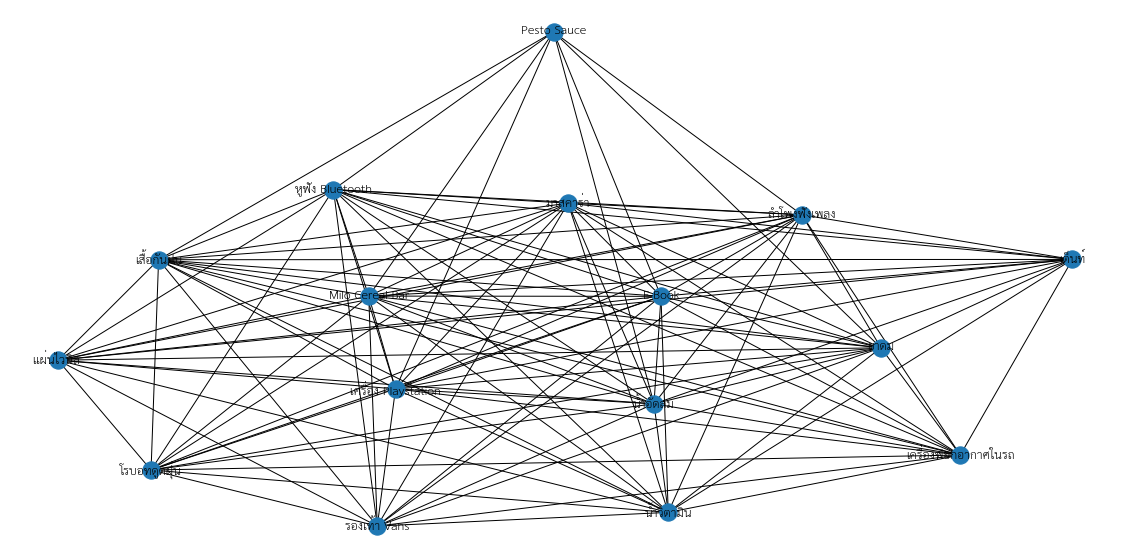

In [72]:
#Visualize rules
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,10))
GA = nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA, with_labels=True, font_family='TH Sarabun Chula', font_size=18)
plt.show()